#### *API and NLP Project (#3)*
---
# __Comparing Text with Supervised Machine Learning__
---
#### *Christopher Caldarella, Data Scientist*
##### *2021-05-04*
---
###### __*Data taken from Reddit.com*__


In [1]:
from ipynb.fs.full.functions import *

In [2]:
# Data to create our model
# dfa = pd.read_csv('../data/ama_comments.csv')
# dfb = pd.read_csv('../data/ar_comments.csv')
# dfa = pd.read_csv('../data/2021-05-03_2005_AMA_comments.csv')
# dfb = pd.read_csv('../data/2021-05-03_2005_AskReddit_comments.csv')
dfa = pd.read_csv('../data/2021-05-04_1007_AMA_comments.csv')
dfb = pd.read_csv('../data/2021-05-04_1007_AskReddit_comments.csv')

df = pd.concat([dfa, dfb], axis=0).reset_index(drop=True)

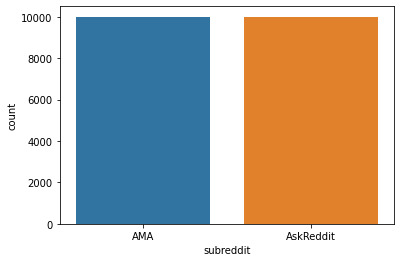

In [3]:
# Null model
sns.countplot(df['subreddit']);
# plt.savefig('../images/subreddit_count.png')

In [4]:
df = CleanUp(df).df.copy()

In [5]:
# Model X, and y
df = df.sample(n=df.shape[0], random_state=3)

X = df['body']
y = df['subreddit_binary']

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=3)

In [6]:
# TEST data (not part of train/test/split)
# df1 = pd.read_csv('../data/2021-05-03_1936_AMA_comments.csv')
# df2 = pd.read_csv('../data/2021-05-03_1936_AskReddit_comments.csv')
df1 = pd.read_csv('../data/2021-05-04_0920_AMA_comments.csv')
df2 = pd.read_csv('../data/2021-05-04_0920_AskReddit_comments.csv')
df_test_pred = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [7]:
df_test_pred = CleanUp(df_test_pred).df.copy()

In [8]:
# Model Test Data
df_test_pred = df_test_pred.sample(n=df_test_pred.shape[0], random_state=3)

X_new = df_test_pred['body']
y_new = df_test_pred['subreddit_binary'] 

<h2 style="color:black;"> TfidfVectorizer(), LogisticRegression() (with GridSearch/Pipeline) </h2>


In [9]:

X_gs_tv_lgr = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    LogisticRegression()), 
    X_train=X, X_test=X_new, y_train=y, y_test=y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf LogReg')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [10]:

print(X_gs_tv_lgr.model.best_params_)
print(X_gs_tv_lgr.model.best_estimator_)
print(X_gs_tv_lgr.model.best_score_)


{'tfidfvectorizer__max_features': 5000, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__stop_words': None}
Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('logisticregression', LogisticRegression())])
0.7116775007725575


<h2 style="color:black;"> TfidfVectorizer(), MultinomialNB() (with GridSearch/Pipeline) </h2>


In [11]:
X_gs_tv_nb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf nBayes')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [12]:

print(X_gs_tv_nb.model.best_params_)
print(X_gs_tv_nb.model.best_estimator_)
print(X_gs_tv_nb.model.best_score_)


{'tfidfvectorizer__max_features': 5000, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__stop_words': None}
Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=5000)),
                ('multinomialnb', MultinomialNB())])
0.6958779155222097


In [13]:
compare_df = pd.concat([X_gs_tv_lgr.df, X_gs_tv_nb.df], axis=1)
compare_df

,Xy/new Tfidf LogReg,Xy/new Tfidf nBayes
F1 Score,0.720850,0.662954
Recall Score,0.748205,0.641026
Accuracy,0.710776,0.674686
Balanced Accuracy,0.710842,0.674626
Precision Score,0.695424,0.686436
Average Precision Score,0.761512,0.756516
ROC AUC Score,0.776260,0.755035
True Positive,1318.000000,1386.000000
False Negative,639.000000,571.000000
False Positive,491.000000,700.000000


# Comparing Confusion Matrices

## Train Data

### Logistic Regression 


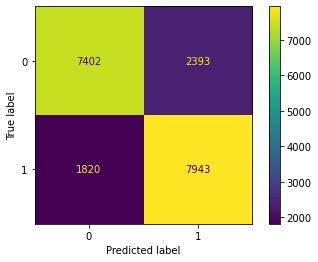

In [14]:
X_gs_tv_lgr.plot_confusion_matrix(X, y)

### Naive Bayes 


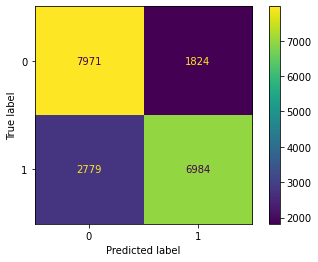

In [15]:
X_gs_tv_nb.plot_confusion_matrix(X, y)

## Test Data

### Logistic Regression 


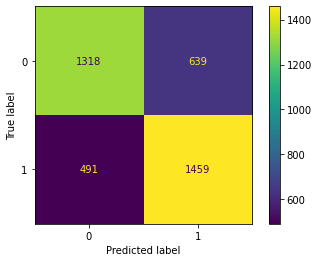

In [16]:
X_gs_tv_lgr.plot_confusion_matrix(X_new, y_new)

### Naive Bayes 


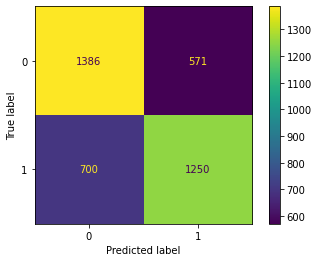

In [17]:
X_gs_tv_nb.plot_confusion_matrix(X_new, y_new)

## How do the predictions compare with our data?

In [18]:
y_pred_lgr = X_gs_tv_lgr.y_pred
y_pred_lgr = pd.Series(y_pred_lgr)
y_pred_lgr.name = 'logreg_predicted_binary'
y_pred_lgr = pd.DataFrame(y_pred_lgr, index=y_new.index)

y_pred_nb = X_gs_tv_nb.y_pred
y_pred_nb = pd.Series(y_pred_nb)
y_pred_nb.name = 'bayes_predicted_binary'
y_pred_nb = pd.DataFrame(y_pred_nb, index=y_new.index)

pred_df = pd.concat([df_test_pred, pd.DataFrame(y_pred_lgr), pd.DataFrame(y_pred_nb)], axis=1).reset_index(drop=True)

In [31]:
check_p = pred_df.sample(1)
idx = check_p.index[0]
# idx = 5 # Try these values to see where they differ: 1 # 5 # 19 # 22

actual_out = np.where(pred_df.iloc[idx]['subreddit_binary'] == 0, 'AMA', 'AskReddit')
pred_out_lgr = np.where(pred_df.iloc[idx]['logreg_predicted_binary'] == 0, 'AMA', 'AskReddit')
is_match_lgr = np.where(actual_out == pred_out_lgr, 'CORRECT!', 'wrong!')

actual_out = np.where(pred_df.iloc[idx]['subreddit_binary'] == 0, 'AMA', 'AskReddit')
pred_out_nb = np.where(pred_df.iloc[idx]['bayes_predicted_binary'] == 0, 'AMA', 'AskReddit')
is_match_nb = np.where(actual_out == pred_out_nb, 'CORRECT!', 'wrong!')

print(f'\nGuessing Game: See if a Randomly selected comment was predicted correctly!')
print(f"\nActual Value:           {actual_out}")
print(f'  (Index: {idx})')

print(f'\nNaive Bayes is:         {is_match_nb}')
print(f"Prediction:             {pred_out_nb}\n")

print(f'\nLogistic Regression is: {is_match_lgr}')
print(f"Prediction:             {pred_out_lgr}\n")



Guessing Game: See if a Randomly selected comment was predicted correctly!

Actual Value:           AskReddit
  (Index: 364)

Naive Bayes is:         wrong!
Prediction:             AMA


Logistic Regression is: wrong!
Prediction:             AMA



In [20]:
# Number of entries that differ between Logistic Regression and Naive Bayes
pred_df[pred_df['logreg_predicted_binary'] != pred_df['bayes_predicted_binary']]['subreddit_binary'].sort_index().sum()

465

In [21]:
# where Logistic Regression and Naive Bayes Differ, sorted by index.
# pred_df[pred_df['logreg_predicted_binary'] != pred_df['bayes_predicted_binary']]['subreddit_binary'].sort_index()

In [30]:
df['body'][1]

'All of the above! We can agree to a settlement of a lump sum payment at about 70% of the total debt owing, we can cut interest completely and reduce minimum payments to 10$ for up to a year in special cases. We can almost always reduce interest which will reduce minimums. I can throw down a payment equal to the clients next payment if they were just stuck for one month. My higher-ups have even more power. They typically give very special programs to people like pensioners and retirees who have unmanageable debt and need long-term help.\n\nedit: the catch to these programs is that in some cases can damage your credit, but mainly is that they have tight restrictions on re-offers. So if you happen to exploit us for a program you dont really need, if you get strapped in the near future you a shit outta luck. Use the privilege wisely.'

#### Trying RFC with otherfeatures (no `body` from comments)

In [22]:
X_nobody = df.drop(columns=['subreddit_binary', 'body'])
y_nobody = df['subreddit_binary']

X_nobody_new = df_test_pred.drop(columns=['subreddit_binary', 'body'])
y_nobody_new = df_test_pred['subreddit_binary'] 

In [28]:
X_nobody.columns

Index(['author_premium', 'is_submitter', 'no_follow', 'score', 'send_replies',
       'total_awards_received', 'post_length'],
      dtype='object')

In [23]:
(X_nobody.shape, y_nobody.shape, X_nobody_new.shape, y_nobody_new.shape)

((19558, 7), (19558,), (3907, 7), (3907,))

In [24]:
X_gs_rfc = ClassificationModel(make_pipeline(
    RandomForestClassifier()), 
    X_train=X_nobody, X_test=X_nobody_new, y_train=y_nobody, y_test=y_nobody_new,
    params={
        'randomforestclassifier__criterion': [ 'gini', 'entropy' ],
        'randomforestclassifier__max_depth': [ None, 1, 2, 3 ],
        'randomforestclassifier__random_state': [ 3 ]
}, verbose=3, mod_name='Xy/new RFC')

print(X_gs_rfc.model.best_params_)
X_gs_rfc.df

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 1, 'randomforestclassifier__random_state': 3}


,Xy/new RFC
F1 Score,0.715163
Recall Score,0.955385
Accuracy,0.620169
Balanced Accuracy,0.620768
Precision Score,0.571472
Average Precision Score,0.604027
ROC AUC Score,0.638320
True Positive,560.000000
False Negative,1397.000000
False Positive,87.000000


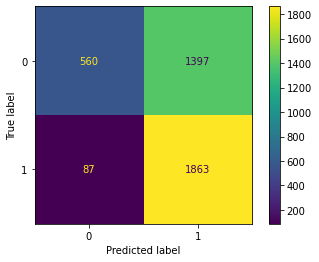

In [25]:
X_gs_rfc.plot_confusion_matrix(X_nobody_new, y_nobody_new)